<a href="https://colab.research.google.com/github/nislambd/D7041E/blob/main/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D7041E Applied artificial intelligence (Lab 3)
Nazrul Islam & Srinivas Bobba (Group 6)

In [ ]:
import numpy as np
import itertools
import sklearn.metrics
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pathlib import Path

In [ ]:
#file_path = os.path.abspath(__file__) # full path of the script
file_path = os.path.abspath('')
dir_path = os.path.dirname(file_path) # full path of the directory

print(file_path)
print(dir_path)

c:\MyML\Notebooks\LTU\D7041E\Lab3
c:\MyML\Notebooks\LTU\D7041E


In [ ]:
language_codes = ["bg", "cs", "da", "de", "el", "es", "et", "fi", "fr", "hu", "it", "lt", "lv", "nl", "pl", "pt", "ro", "sk", "sl", "sv", "en"]
language_codes_3 = ["bul", "ces", "dan", "deu", "ell", "spa", "est", "fin", "fra", "hun", "ita", "lit", "lav", "nld", "pol", "por", "ron", "slk", "slv", "swe", "eng"]

## Task 1.1 Import datasets into Jupyter environment

### In this section, we download all the required files

The training data that is based on the Wortschatz Corpora

In [ ]:
import tarfile

def download_file(url, download_dir="/"):
  file_name = os.path.basename(url)

  #download the file
  if os.path.exists(os.path.join(file_path, download_dir, file_name)):
    print(f'{os.path.join(file_path, download_dir, file_name)} already downloaded.')
    #return
  else:
    response = requests.get(url)
    with open(os.path.join(file_path, download_dir, file_name), mode="wb") as file:
      file.write(response.content)

  #extract the compressed file
  compressed_file = tarfile.open(os.path.join(file_path, download_dir, file_name))
  #print(compressed_file.getnames())

  compressed_file.extractall(os.path.join(file_path, download_dir))
  compressed_file.close()

  print(f'{file_name} downloaded/extracted.')

In [ ]:
download_file("https://downloads.wortschatz-leipzig.de/corpora/deu_newscrawl-public_2018_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/eng_newscrawl-public_2018_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/bul_newscrawl_2017_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/ces_newscrawl_2019_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/dan_newscrawl_2019_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/ell_newscrawl_2017_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/est_newscrawl_2017_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/spa_newscrawl-public_2019_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/fin_newscrawl_2017_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/fra_newscrawl_2018_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/hun_newscrawl_2017_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/ita_newscrawl_2019_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/lav_newscrawl_2016_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/lit_newscrawl_2016_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/nld_newscrawl_2019_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/pol_newscrawl_2018_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/por_newscrawl_2018_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/ron_newscrawl_2015_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/slk_newscrawl_2016_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/slv_newscrawl_2016_10K.tar.gz", "leipzig")
download_file("https://downloads.wortschatz-leipzig.de/corpora/swe_newscrawl_2018_10K.tar.gz", "leipzig")

In [ ]:
train_data = {}
train_data['language'] = []
train_data['sentence'] = [""]*21

for (i,f) in enumerate(Path("./leipzig").glob("**/*sentences.txt")):
  #print(i, f)

  file_name = os.path.basename(f)
  language_code = file_name[:3]

  print(language_code, file_name)

  train_data['language'].append(language_code)

  with open(f, "r", encoding="utf-8") as file:
    #train_data['sentence'][i] = "".join(file.readlines(50000))
    #for line in file:
    #  #print(line.rstrip())
    #  train_data['sentence'][i] += line.rstrip()
    for line in file.readlines(100000):
      train_data['sentence'][i] += line.rstrip()

bul bul_newscrawl_2017_10K-sentences.txt
ces ces_newscrawl_2019_10K-sentences.txt
dan dan_newscrawl_2019_10K-sentences.txt
deu deu_newscrawl-public_2018_10K-sentences.txt
ell ell_newscrawl_2017_10K-sentences.txt
eng eng_newscrawl-public_2018_10K-sentences.txt
est est_newscrawl_2017_10K-sentences.txt
fin fin_newscrawl_2017_10K-sentences.txt
fra fra_newscrawl_2018_10K-sentences.txt
hun hun_newscrawl_2017_10K-sentences.txt
ita ita_newscrawl_2019_10K-sentences.txt
lav lav_newscrawl_2016_10K-sentences.txt
lit lit_newscrawl_2016_10K-sentences.txt
nld nld_newscrawl_2019_10K-sentences.txt
pol pol_newscrawl_2018_10K-sentences.txt
por por_newscrawl_2018_10K-sentences.txt
ron ron_newscrawl_2015_10K-sentences.txt
slk slk_newscrawl_2016_10K-sentences.txt
slv slv_newscrawl_2016_10K-sentences.txt
spa spa_newscrawl-public_2019_10K-sentences.txt
swe swe_newscrawl_2018_10K-sentences.txt


The test data that is based on the Euro Parliament Parallel Corpus

In [ ]:
for (i,code) in enumerate(language_codes):
  if code != "en":
    download_url = "https://www.statmt.org/europarl/v7/" + code + "-en.tgz"
    download_file(download_url,"europarl")

In [ ]:
test_data = {}
test_data['language'] = language_codes
test_data['sentence'] = [""]*21

for code in test_data['language']:
  #print(code)
  for f in Path(file_path +"/europarl").glob("**/*."+code):
    file_name = os.path.basename(f)
    print("Reading ", file_name)

    language_code = file_name[-2:]
    #print(language_code)
    idx = test_data['language'].index(language_code)
    with open(f, "r", encoding="utf-8") as file:
      #lines = file.readlines(50000)
      #test_data['sentence'][idx] = "".join(lines)
      for line in file.readlines(100000):
        if line.strip() != "":
          test_data['sentence'][idx] += line.rstrip()


Reading  europarl-v7.bg-en.bg
Reading  europarl-v7.cs-en.cs
Reading  europarl-v7.cs-en.cs
Reading  europarl-v7.da-en.da
Reading  europarl-v7.de-en.de
Reading  europarl-v7.el-en.el
Reading  europarl-v7.es-en.es
Reading  europarl-v7.et-en.et
Reading  europarl-v7.fi-en.fi
Reading  europarl-v7.fr-en.fr
Reading  europarl-v7.hu-en.hu
Reading  europarl-v7.it-en.it
Reading  europarl-v7.lt-en.lt
Reading  europarl-v7.lv-en.lv
Reading  europarl-v7.nl-en.nl
Reading  europarl-v7.pl-en.pl
Reading  europarl-v7.pt-en.pt
Reading  europarl-v7.ro-en.ro
Reading  europarl-v7.sk-en.sk
Reading  europarl-v7.sl-en.sl
Reading  europarl-v7.sv-en.sv
Reading  europarl-v7.sv-en.en
Reading  europarl-v7.cs-en.en


In [ ]:
print(test_data['sentence'][19][:100])

Återupptagande av sessionenJag förklarar Europaparlamentets session återupptagen efter avbrottet den


In [ ]:
#import shutil
#shutil.rmtree("deu_newscrawl-public_2018_10K", ignore_errors=True)

### Data Pre-processing
The following carries out the necesssary pre-processings.

In [ ]:
#!pip install unidecode

In [ ]:
import string
import re
from unidecode import unidecode
#from bs4 import BeautifulSoup

url_pattern = re.compile(r'(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?[a-zA-Z0-9]{2,}(\.[a-zA-Z0-9]{2,})(\.[a-zA-Z0-9]{2,})?')


def pre_process(sentence):
  sentence = unidecode (sentence) # convert string to unicode
  sentence = sentence.lower() # convert all characters to lower case
  sentence = url_pattern.sub('', sentence) # remove any URLs
  sentence = re.sub("\S*\d\S*", "", sentence).strip() # Remove any numbers
  #sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence) # Remove other unwanted characters
  #sentence = re.sub('\W+', r'', sentence) # Remove other unwanted characters
  sentence = sentence.translate(str.maketrans('', '', string.punctuation))
  sentence.replace('\\n','').replace('\n', '').replace('\\r', '').replace('\\t','').replace('\t','')
  sentence = re.sub('\s+',' ',sentence)

  return sentence

In [ ]:
test_sentence = "th!s is only test to see if http://www.bbac.omc is taken out', AND @ characters to BE removed# 988789879 is number kiidd9999. $$ <mlxtag> Състав на Парламента: вж. протоколи"
print(pre_process(test_sentence))

ths is only test to see if is taken out and characters to be removed is number mlxtag sstav na parlamenta vzh protokoli


In [ ]:
for (i,sentence) in enumerate(train_data['sentence']):
  train_data['sentence'][i] = pre_process(sentence)

In [ ]:
print(train_data['sentence'][19][:100])

 fran skrotnisses lekplats i betyg hotel trollhattan erbjuder hotellrum med narhet till restauranger


In [ ]:
for (i,sentence) in enumerate(test_data['sentence']):
  test_data['sentence'][i] = pre_process(sentence)

In [ ]:
print(test_data['sentence'][19][:100])

aterupptagande av sessionenjag forklarar europaparlamentets session aterupptagen efter avbrottet den


## Task 2.1 Constructing high-dimensional centroids

In [ ]:
alphabet = ' abcdefghijklmnopqrstuvwxyz'
n_g = 3
N_GRAMS=[p for p in itertools.product(alphabet, repeat=n_g)] # get all possible n-grams

### Question: what will be the size of the n-gram input vector in conventional (local) representation?
The size of the input vector in conventional (local) representation would be 19683 which is also (alphabet_size)^3.

In [ ]:
len(N_GRAMS)

19683

### Question: Identify difficulties of working with conventional representations of n-grams in the machine learning context.

- As the size of n-grams increases, the dimensionality of the vector space increases.
- High-dimensional vectors require more memory.
- Processing and comparing high-dimensional vectors are  computationally expensive.
- Large number of parameters makes it hard to generalize to unseen data, hence overfits to training data.

### Encoding of n-grams using d-dimensional {+1,-1} distributed representation

In [ ]:
alphabet_size = len(alphabet)
hd_dimension = 100  # Hyperdimensional vector dimension

As mentioned in paper, we initialize a vector, which will store n-gram statistics.

In [ ]:
random_item_memory_H = np.random.choice([-1, 1], size=(alphabet_size, hd_dimension))
#print(s)

We create another vector to help us keep track the position during the process permuting HD vector

In [ ]:
permutations =  [np.random.choice([-1, 1], size=hd_dimension) for _ in range(n_g)]
#print(permuations)

We create encoded n-gram based on the N-GRAMS, the hd memory and the characters in english alphabet

In [ ]:
def encode_ngram(ngram, item_memory, permutation_vector):
    length = len(ngram)
    ngram_encoded = np.ones(item_memory.shape[1])  #help with element wise mutliplication below

    for j in range(length):
        if ngram[j].isspace():
            symbol_position = 26
        else:
            symbol_position = ord(ngram[j]) - ord('a')

        permuted_vector = item_memory[symbol_position] * permutation_vector[j]
        ngram_encoded *= permuted_vector  # element-wise multiplication here

    return ngram_encoded

In [ ]:
N_GRAMS_encoded = {}
for ngram in N_GRAMS:
    N_GRAMS_encoded[str(ngram)] = encode_ngram(ngram, random_item_memory_H, permutations)

## Task 2.2. Classification using hyperdimensional centroids

#### Training: create N_grams for the languages from the training data

Here we take trigrams from the sentences and using the encoded N-grams we update the centroids by adding to them the value of the hd vector corresponding to the specific N-gram we are evaluating. At the end, we are left with 21 centroids which are d-dimensional.

In [ ]:
# collect n-gram statitics for all training data
#TR_grams=np.zeros((len(N_GRAMS),langLabels.size), dtype='float') # initialize n-gram statistics for the  training
TR_grams=[[0]*hd_dimension]*21 # initialize n-gram statistics for the  training

In [ ]:
#N_GRAMS_encoded.keys()

In [ ]:
for i in range(len(train_data["language"])):
    print(train_data["language"][i])

    buf_chop = train_data["sentence"][i]
    for j in range (len(buf_chop) - (n_g-1)):
        ngc=buf_chop [j:(j+(n_g))] #pick current n-gram
        #print(ngc)
        ngc1= tuple(ngc)
        #ind_ngc=N_GRAMS.index(ngc1) # find index in  N_GRAMS
        TR_grams[i]+=N_GRAMS_encoded[str(ngc1)] #increment the corresponding statisticss

    #TR_grams[:,i]=TR_grams[:,i]/np.linalg.norm(TR_grams[:,i]) # normalize

bul
ces
dan
deu
ell
eng
est
fin
fra
hun
ita
lav
lit
nld
pol
por
ron
slk
slv
spa
swe


In [ ]:
#print(TR_grams)

#### Testing
Similarly to the training process, we calculate the centroids for each language in the test data .

We then compare the centroids calculated for each language with all the 21 centroids previously calculated during the training using cosine similarity, and assign the label of the centroid in the training with the highest similarity to the test data we are evaluating.

In [ ]:
# collect n-gram statistics for all testing data
labels_size = len(test_data["language"])
exm_size = 3
TS_grams = [[0] * hd_dimension for _ in range(labels_size * exm_size)]  # initialize n-gram statistics for the test example

GT = [None] * labels_size * exm_size  # ground truth
PR = [None] * labels_size * exm_size  # prediction

for i in range(labels_size):
    print(i, test_data['language'][i])
    buf_chop = test_data["sentence"][i] #pick the current portion
    for j in range(exm_size):

        # Initialize TS_grams for each test example
        for k in range(len(buf_chop) - (n_g - 1)):
            ngc = buf_chop[k:(k + n_g)]  # pick current n-gram
            ngc = tuple(ngc)
            TS_grams[i * exm_size + j] += N_GRAMS_encoded.get(str(ngc), [0] * hd_dimension)  # increment the corresponding statistics

        DP = np.dot(np.array(TS_grams[i * exm_size + j]).reshape(1, -1), np.array(TR_grams).transpose())
        ind = np.argmax(DP)  # index of predicted language
        PR[i * exm_size + j] = test_data["language"][ind]  #test_data["language"][ind]
        GT[i * exm_size + j] = test_data['language'][i]  # add ground truth

        print("predicted ", test_data["language"][ind])

0 bg
predicted  bg
predicted  bg
predicted  bg
1 cs
predicted  sk
predicted  sk
predicted  sk
2 da
predicted  da
predicted  da
predicted  da
3 de
predicted  de
predicted  de
predicted  de
4 el
predicted  el
predicted  el
predicted  el
5 es
predicted  sv
predicted  sv
predicted  sv
6 et
predicted  fi
predicted  fi
predicted  fi
7 fi
predicted  fi
predicted  fi
predicted  fi
8 fr
predicted  fr
predicted  fr
predicted  fr
9 hu
predicted  hu
predicted  hu
predicted  hu
10 it
predicted  it
predicted  it
predicted  it
11 lt
predicted  lv
predicted  lv
predicted  lv
12 lv
predicted  lt
predicted  lt
predicted  lt
13 nl
predicted  nl
predicted  nl
predicted  nl
14 pl
predicted  pl
predicted  pl
predicted  pl
15 pt
predicted  pt
predicted  pt
predicted  pt
16 ro
predicted  sv
predicted  sv
predicted  sv
17 sk
predicted  sk
predicted  sk
predicted  sk
18 sl
predicted  sl
predicted  sl
predicted  sl
19 sv
predicted  en
predicted  en
predicted  en
20 en
predicted  es
predicted  es
predicted  es


#### Result
We calculated both the accuracy and the F1-Score using a weighed mean, as well as presented a visualization with a confusion matrix.

Using a **dimension of 100**, the **accuracy is 61.9%** and **F1 score is 58.73%**. The confusion matrix is plotted below.

In [ ]:
# accuracy and F1-Score
from sklearn.metrics import f1_score

acc=0.0
for i in range(len(GT)):
   acc+=(PR[i]==GT[i])

F1_Score = f1_score(GT, PR, average='weighted')

acc=acc/len(GT)
print(f"The accuracy with dimension {hd_dimension} = {100*acc}%, the F1-Score = {F1_Score}")

The accuracy with dimension 100 = 61.904761904761905%, the F1-Score = 0.5873015873015873


<Axes: >

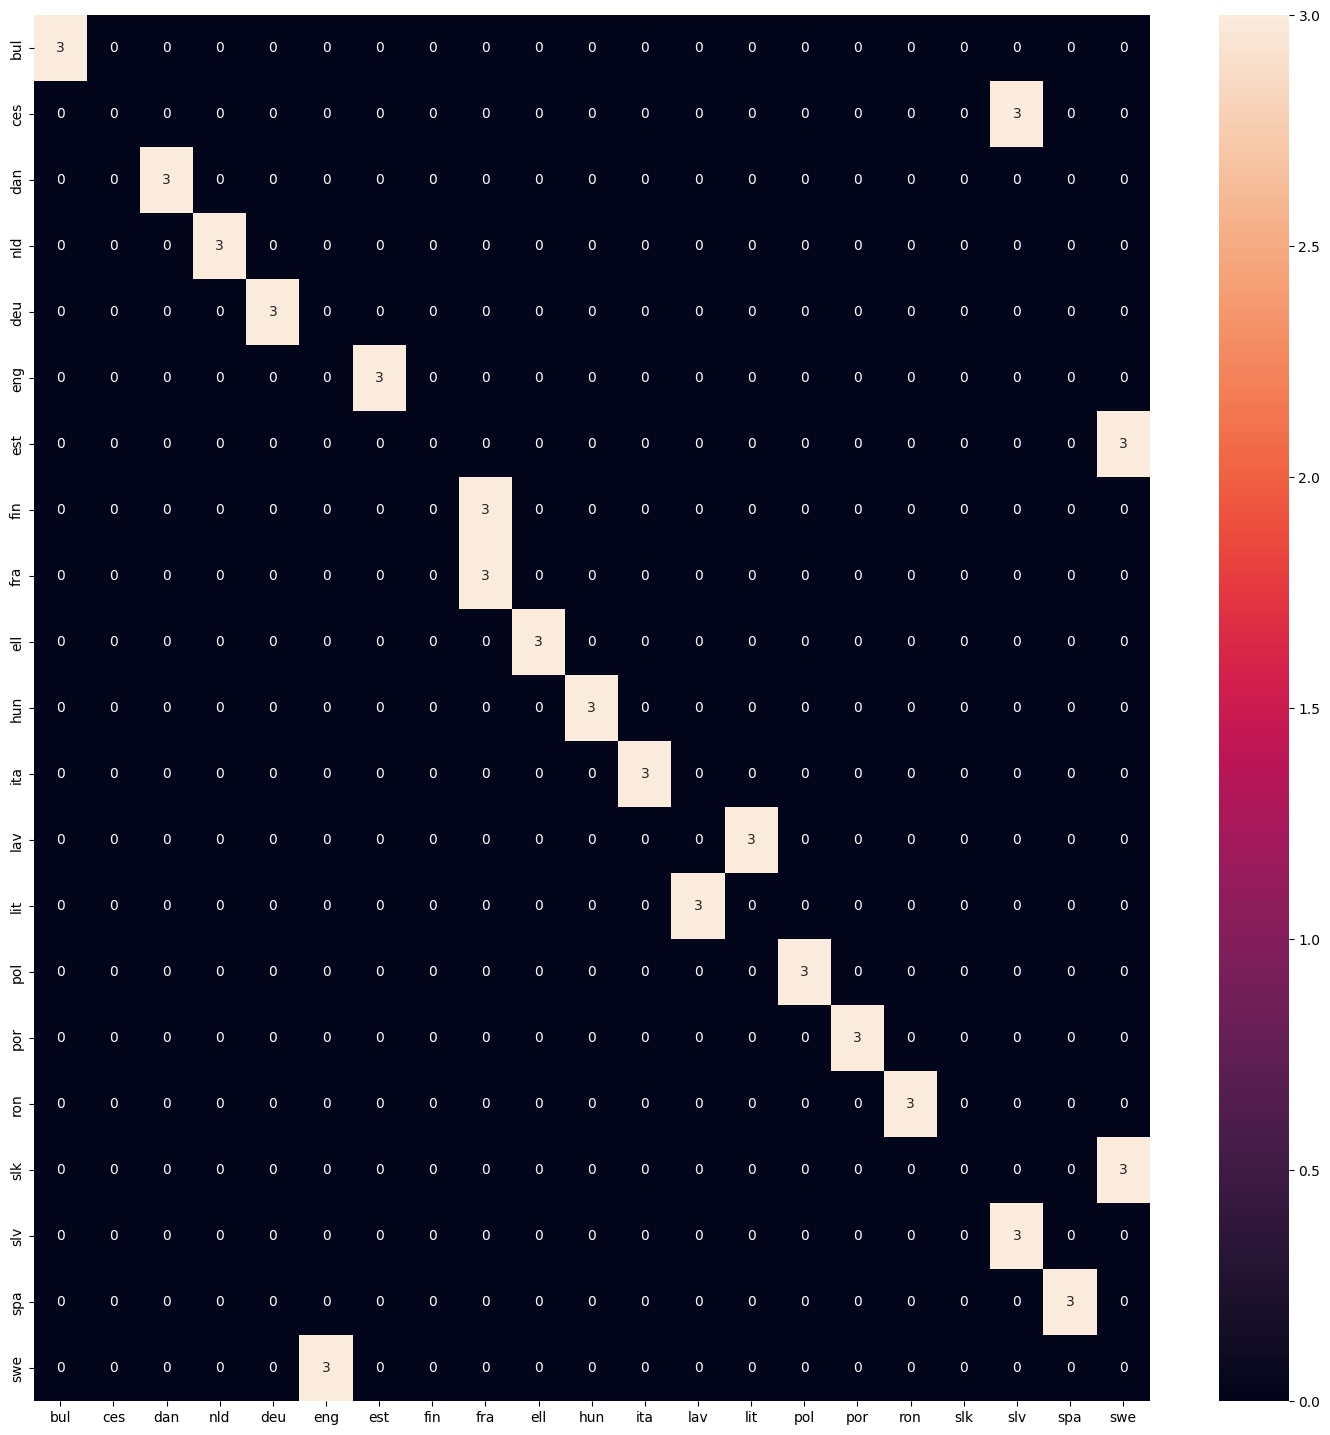

In [ ]:
conf_mat= sklearn.metrics.confusion_matrix(GT, PR, labels=None, sample_weight=None)
Labels_arr = ['bul', 'ces', 'dan', 'nld', 'deu', 'eng', 'est', 'fin', 'fra',
       'ell', 'hun', 'ita', 'lav', 'lit', 'pol', 'por', 'ron', 'slk',
       'slv', 'spa', 'swe']
#plot confusion matrix
%matplotlib inline
df_cm = pd.DataFrame(conf_mat, index = [i for i in Labels_arr], columns = [j for j in Labels_arr])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)

Using a **dimension of 1000**, the **accuracy is 61.9%** and **F1 score is 58.73%**. The confusion matrix is plotted below.

In [ ]:
# accuracy and F1-Score
from sklearn.metrics import f1_score

acc=0.0
for i in range(len(GT)):
   acc+=(PR[i]==GT[i])

F1_Score = f1_score(GT, PR, average='weighted')

acc=acc/len(GT)
print(f"The accuracy with dimension {hd_dimension} = {100*acc}%, the F1-Score = {F1_Score}")

The accuracy with dimension 1000 = 57.14285714285714%, the F1-Score = 0.5158730158730159


<Axes: >

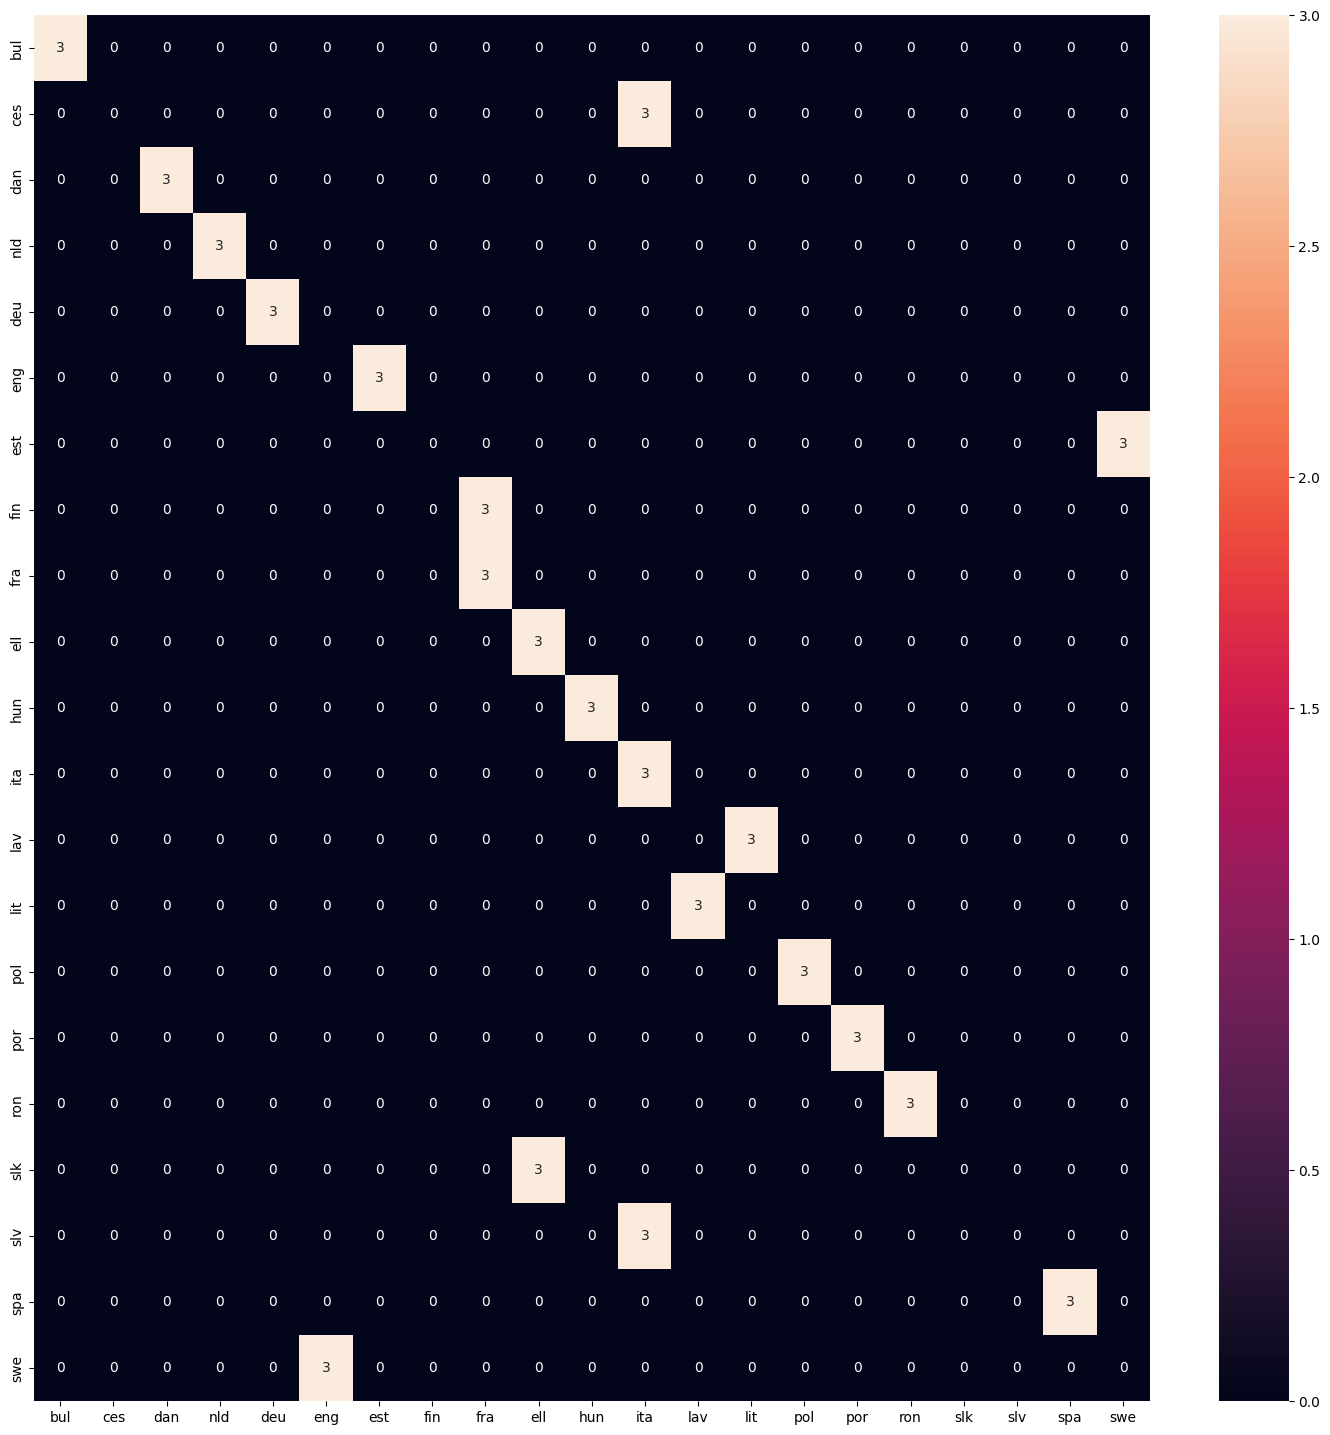

In [ ]:
conf_mat= sklearn.metrics.confusion_matrix(GT, PR, labels=None, sample_weight=None)
Labels_arr = ['bul', 'ces', 'dan', 'nld', 'deu', 'eng', 'est', 'fin', 'fra',
       'ell', 'hun', 'ita', 'lav', 'lit', 'pol', 'por', 'ron', 'slk',
       'slv', 'spa', 'swe']
#plot confusion matrix
%matplotlib inline
df_cm = pd.DataFrame(conf_mat, index = [i for i in Labels_arr], columns = [j for j in Labels_arr])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)